# Practical 1: Image processing with Python


---

The aim of this tutorial is to start studying real data with Python.
As part of the practical work in this course, we will mainly be using 3 Python libraries:
- NumPy, for mathematical calculation and matrix manipulation ;
- Matplotlib, for graphical data visualization;
- OpenCV (cv2) for image manipulation and processing.

For more details on Python, NumPy, Matplotlib and OpenCV, a wide range of resources are available at https://pythonprogramming.net/, including several series of YouTube videos.

Full documentation on Python 3 and the libraries that will be used is available here :
- Python 3: https://docs.python.org/fr/3/
- NumPy : https://docs.scipy.org/doc/numpy-1.15.0/reference/index.html
- Matplotlib : https://matplotlib.org/3.1.1/index.html
- OpenCV : https://docs.opencv.org/4.1.1/index.html (good luck!)

## Ex. 0 : Getting started

Python is a comprehensive language used in many fields, from web development to robotics.

In this series of tutorials, we'll use it for computer vision, mathematical computation and data science.

Start by importing the necessary libraries.

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
%matplotlib inline

# Librairies Matplotlib, NumPy et OpenCV
import matplotlib.pyplot as plt
import numpy as np
import cv2 #OpenCV

# Additional libraries for certain parts of the practical seesions
from sklearn.cluster import MiniBatchKMeans

And set the path to the image database (used later)

In [6]:
# To be changed if the folder is not located here
path_base = '/content/drive/MyDrive/Colab Notebooks/M1_DSAI_IAwAtSI_PW1/Base_images/'

## Ex. 1 : Reading and viewing images with OpenCV

OpenCV can read and decode BMP, JPEG, PNG, WEBP, PBM, PGM, PPM, SR, RAS and TIFF image files. As explained above, an image is represented as a matrix. Before processing an image with OpenCV, you need to read it and decode its format in order to transform it into a matrix of values.

**1.**

Read the *lena_gray.tif* image, in the *base_images* folder, and store it in the *img* variable.

In [7]:
img = cv2.imread(path_base+'lena_gray.tif',-1)
# The 2nd argument designates the color type of the image
# 0 to load in grayscale
# 1 to load in color
# -1 to load as is
print(path_base+'lena_gray.tif')

/content/drive/MyDrive/Colab Notebooks/M1_DSAI_IAwAtSI_PW1/Base_images/lena_gray.tif


Display the image.

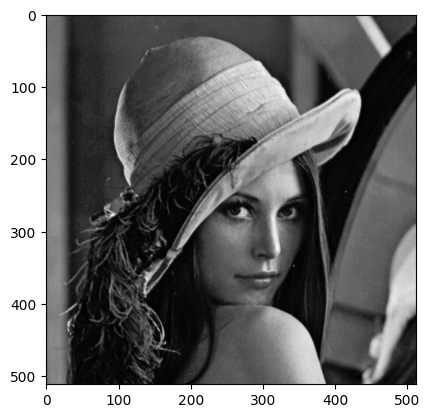

In [8]:
plt.imshow(img,'gray')

Get some useful information from our image.


In [9]:
rows,cols = img.shape
img_dtype = img.dtype

---
**2.**

Each element of the matrix therefore corresponds to a pixel in the image. In the case of our grayscale *img* matrix, each pixel at position *(i,j)* therefore contains a single **_I_** *(i,j)* value, which is the gray level at point *(i,j)* (*i*: row number, *j*: column number).

Retrieve the gray level of pixel *(50,100)*.

In [10]:
img[50,100]

53

Retrieve the top-right quarter of the image *lena_gray.tif* and display the result (image).

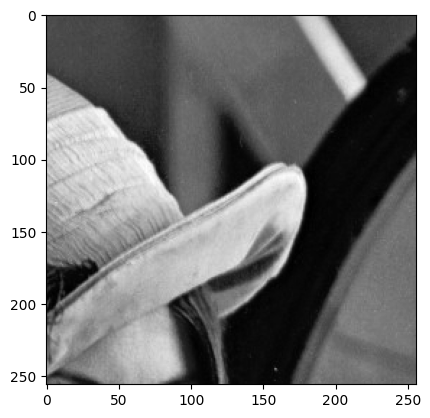

In [12]:
# To be completed
# Retrieve the top right quarter of img
top_right_quarter = img[0:rows//2, cols//2:cols]
# Display the result
plt.imshow(top_right_quarter, cmap='gray')

---
**3.**

Transpose the *img* variable with NumPy's *transpose* function, and display the result in grayscale.

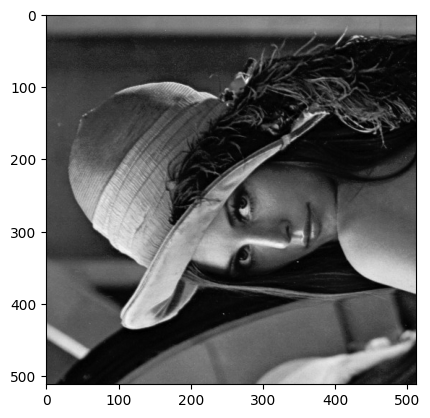

In [13]:
# To complete
transposed_img = np.transpose(img)
plt.imshow(transposed_img, cmap='gray')

Rotate img by 90° using NumPy's *rot90* function and display the result in grayscale.

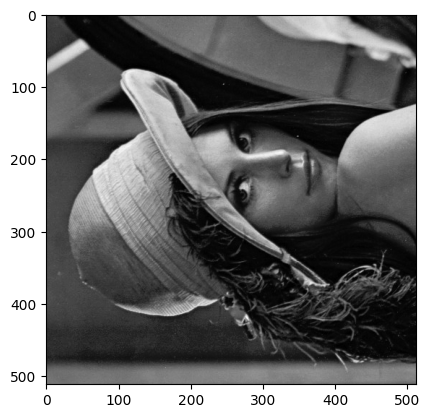

In [14]:
# To be completed
# Rotate the image by 90° and display the result
rotated_img = np.rot90(img)
plt.imshow(rotated_img, cmap='gray')

What do you notice about this rotation ?

**_Another rotation :_**


From a more general point of view, to perform a rotation, translation or both on an image, it is best to use a geometric transformation matrix, which is then applied to the image. Geometric transformation will be covered in the Stereovision course (Semester 4.2).

Rotate *img* by 45° using OpenCV's functions:
- *getRotationMatrix2D* to obtain the 45° rotation matrix for the *img* image;
- *warpAffine* to rotate *img* with the calculated rotation matrix.

Display the result in grayscale.

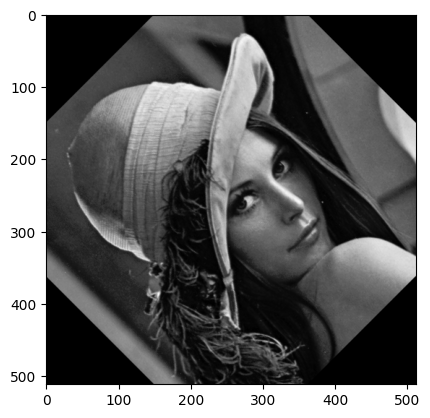

In [16]:
# To be completed
# Calculation of the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1.0)
# Rotate image with rotation matrix and display result
rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))
plt.imshow(rotated_img, cmap='gray')

What do you notice?

---
## Ex 3. Creating and viewing images

**1.**

Create a *_M_* matrix of size *_N x N_* with *N = 256* whose general term is **_M_** *(i,j) = j*, then display it in grayscale.

[[  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]
 ...
 [  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]]


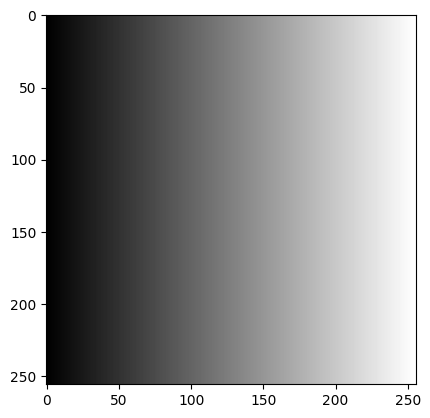

In [95]:
# To be completed
# Creation of matrix M
N = 256
M = np.tile(np.arange(N), (N, 1))
print(M)
# Display matrix M in grayscale
plt.imshow(M, cmap='gray', vmin=0, vmax=255)

---
**2.**

For the moment, we've only displayed our images in grayscale (*'gray'*), but it is possible to use different palettes.

The list of palettes available on Matplotlib can be found at this link: https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html.

Display matrix M with a color palette (other than grayscale)

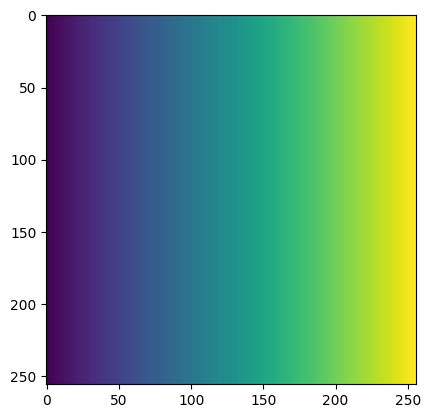

In [18]:
# To be completed
# Display color palette
plt.imshow(M, cmap='viridis', vmin=0, vmax=255)

---
**3. Your own palette**

It's also possible to create your own palette and apply it to an image.

To do this, we'll create a *colormap* instance of the *ListedColormap* class, which will contain the *colors* matrix. This matrix will be of size *(N,4)*, where N is a natural number of your choice. The first 3 columns (RGB) will contain reals between 0 and 1, and the last column (A for transparency) will be a vector filled with 1, of length *N*.

In [96]:
# To be complete
N = 256
colors = np.ones((N, 4))
colors[:, 0] = np.linspace(0, 1, N)
colors[:, 1] = np.linspace(1, 0, N)
# Checking the size of the colors matrix
assert colors.shape == (N,4), 'la taille de la matrice doit être (N, 4), N = '+str(N)+' , colors.shape = '+str(colors.shape)

In [97]:
# Creation of the colormap
from matplotlib.colors import ListedColormap
colormap = ListedColormap(colors)

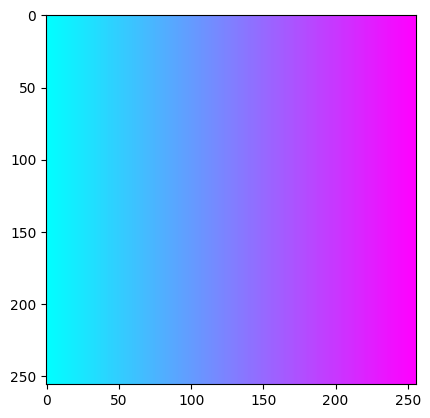

In [98]:
# To complete
# Displaying the M matrix with the created palette
M = np.tile(np.arange(N), (N, 1))
plt.imshow(M, cmap=colormap, vmin=0, vmax=255)

## Ex. 4 : Calculating images ###

For this part, let's move on to color by studying the image lena_color.tif.

**1.**

Start by loading it and storing it in the img_color variable.

In [72]:
# To be completed
# Charging the image lena_color.tif
img_color = cv2.imread(path_base+'lena_color.tiff',-1)

Display the number of dimensions of the loaded image.

In [73]:
# To be completed
# Display of the number of dimesions
rows_color,cols_color = img.shape
img_color_dtype = img.dtype
print(rows_color, cols_color)

512 512


---
**2.**

Display image dimensions.

In [74]:
# To be completed
# Display of the image dimensions
print(img_color.ndim)

3


You can see that the loaded color image has 3 channels: a blue channel, a green channel and a red channel. The image format is BGR (Blue, Green, Red). Display the image's blue, green and red components (B&W images of the intensities of each channel).

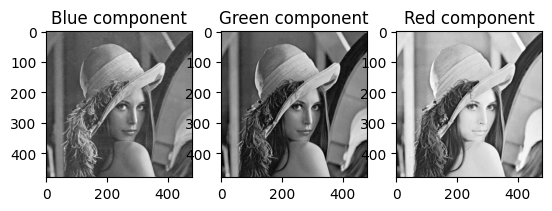

In [75]:
# To be completed
# Display of each color component (in B&W)
blue, green, red = cv2.split(img_color)
plt.subplot(1,3,1)
plt.imshow(blue, cmap='gray')
plt.title("Blue component")
plt.subplot(1,3,2)
plt.imshow(green, cmap='gray')
plt.title("Green component")
plt.subplot(1,3,3)
plt.imshow(red, cmap='gray')
plt.title("Red component")
plt.show()

Display the img_color image in color.

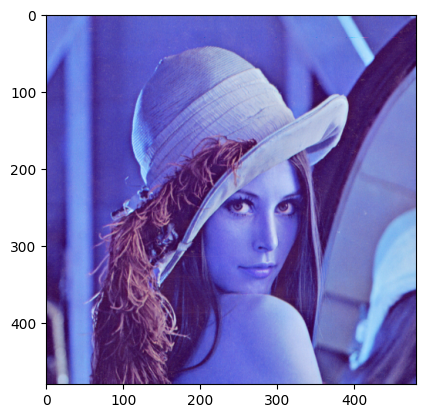

In [79]:
# To be completed
# Display of img_color in colors
plt.imshow(img_color)

Does the image look odd? Do you notice any particular problem? Color-wise? That's normal: Matplotlib's default palette is BGR (Blue, Green, Red), not RGB.

For practical reasons, convert the BGR image to RGB format using the cv2.cvtColor function with cv2.COLOR_BGR2RB as parameter:

        img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

In [83]:
# To be completed
# Image conversion from BGR to RGB
img_color_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

Affichez l'image RGB.

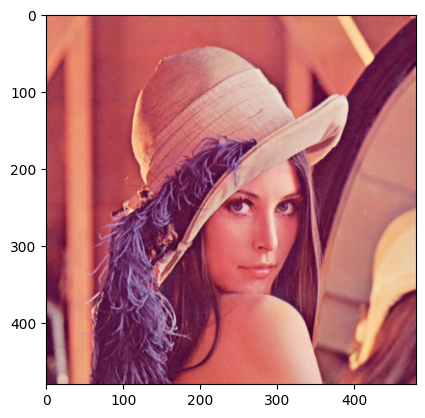

In [85]:
# To be completed
# Display of img_color in colors
plt.imshow(img_color_rgb)

---
**3.**

Convert the RGB color image *img_color_rgb* to grayscale:
- Using OpenCV's cvtColor function
- By calculating it manually using the formula *$I_{gray}$ = $\alpha$R + $\beta$G + $\gamma$B* where *$\alpha$ = 0.2989*, *$\beta$ = 0.5870* and *$\gamma$ = 0.1140*.

[[162 162 162 ... 170 157 129]
 [162 162 162 ... 170 157 129]
 [162 162 162 ... 170 157 129]
 ...
 [ 43  43  49 ... 103 100  98]
 [ 44  45  54 ... 103 105 107]
 [ 44  45  55 ... 103 105 108]]


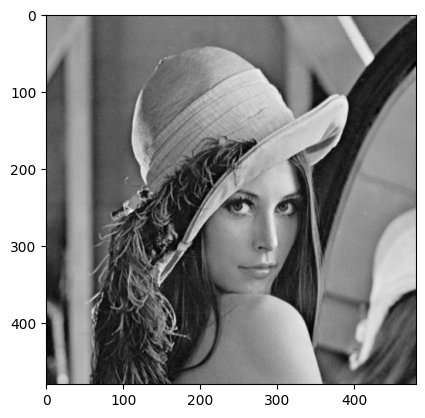

In [91]:
# To be completed
# Grayscale conversion with cvtColor
img_gray = cv2.cvtColor(img_color_rgb, cv2.COLOR_RGB2GRAY)
# Display grayscale image
plt.imshow(img_gray, cmap="gray")
print(img_gray)

[[162 162 162 ... 170 156 129]
 [162 162 162 ... 170 156 129]
 [162 162 162 ... 170 156 129]
 ...
 [ 42  43  49 ... 103  99  98]
 [ 43  44  53 ... 102 104 107]
 [ 43  44  54 ... 102 105 107]]


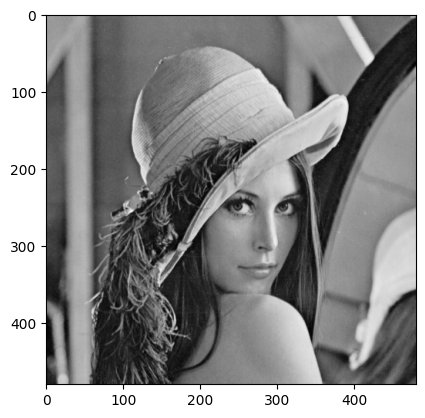

In [102]:
# To be completed
alpha = 0.2989
beta = 0.5870
gamma = 0.1140

# Manual greyscale conversion
img_gray_manual = (
  alpha * img_color_rgb[:, :, 0] +
  beta * img_color_rgb[:, :, 1] +
  gamma * img_color_rgb[:, :, 2]
).astype(np.uint8)
# Grayscale image display
plt.imshow(img_gray_manual, cmap='gray')
print(img_gray_manual)

Compare the results:
- On the matrices themselves ;
- Visually

**_ANSWER :_**
The matrices are very similar with few values different only by 1.
The image we generated using the manual method seems to be almost exactly the same with the openCV's function's result.

---
## Ex. 5 : Quantization

**1.**

For this part, we're going to reuse the image lena_gray.tif. Load it.

In [93]:
# To complete
# Load lena_gray grayscale image
img = cv2.imread(path_base+'lena_gray.tif',-1)

In order to compress the image, we're going to reduce the number of gray levels by quantization.

Here, we'll perform a uniform scalar quantization: starting with an image containing K levels of gray, we'll reduce this number to N levels of gray.

In our case, quantization is scalar (i.e. our dictionary will be made up of scalars, i.e. the gray levels selected), and uniform. This means that the quantization step (the interval between 2 gray levels retained) is constant. You'll need to calculate the quantization step as a function of your image and N (number of gray levels required).

In [94]:
# To be completed
# imquantize function
def imquantize(img,N):
    img = img.astype(np.float32)
    Q = 256 / N
    quantized_img = (img // Q) * Q
    return quantized_img.astype(np.uint8)

We want to determine the influence of variable-step quantization.

Apply quantization to the image *lena_gray* to keep 128, 64, 32, 16, 8, 4 and 2 levels of gray.

In [116]:
# To be completed
# No quantification stored in a list
gray_levels = [128, 64, 32, 16, 8, 4, 2]
# Construction of a list of quantized images corresponding to each quantization step
quantized_images = [imquantize(img, N) for N in gray_levels]

Display the corresponding quantized images at each quantization step to determine the minimum quantization threshold at which some false contours appear.

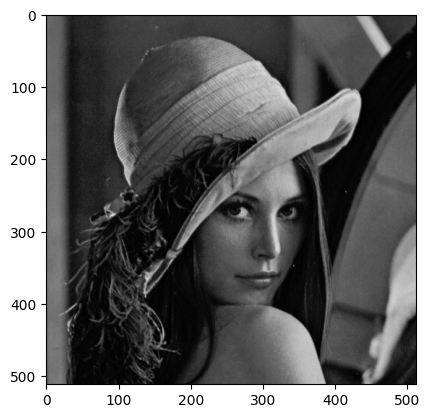

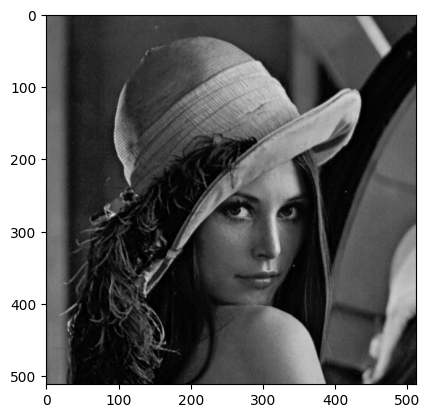

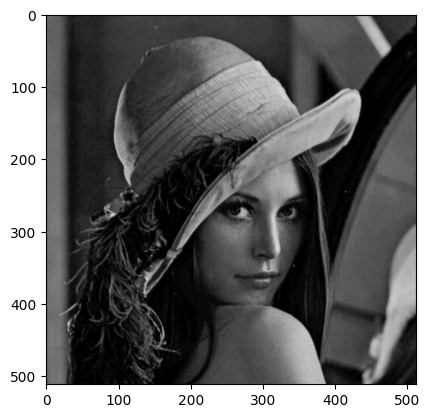

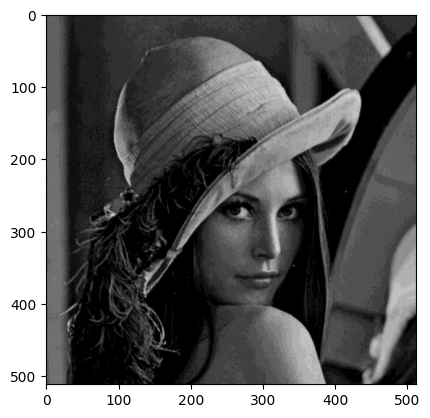

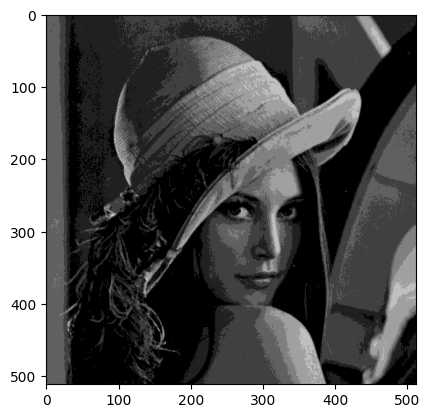

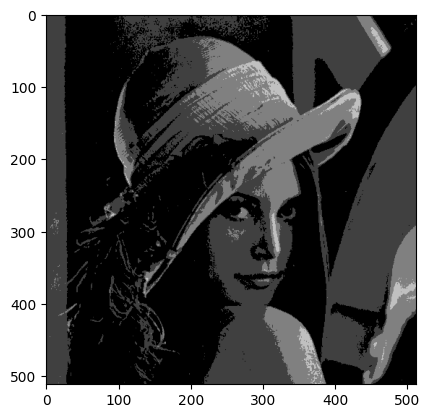

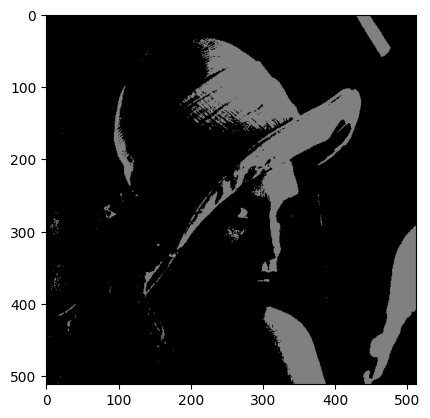

In [117]:
# To be completed
# Display original and quantized images
for i, (quant_img, levels) in enumerate(zip(quantized_images, gray_levels), start=2):
  plt.imshow(quant_img, cmap='gray', vmin=0, vmax=255)

  plt.show()

We're now going to create a histogram of an image. This is a graph showing the distribution of image values. It's a much-used tool in this field, so the key is to construct a histogram correctly. A well-constructed histogram is one with :
- X-axis: the possible values that an image pixel can take (even if they are not actually present in the image).
- On the ordinate: the number of pixels in the image equal to the abscissa value. The sum of all ordinate values gives us the number of pixels in the image.

Implement a function that displays the grayscale histogram of an image.

In [119]:
# To be completed
# Function for creating histograms of an image's gray levels
def hist(img):
    histogram = np.zeros(256, dtype=int)
    rows, cols = img.shape
    for i in range(rows):
        for j in range(cols):
            pixel_value = img[i, j]
            histogram[pixel_value] += 1
    return histogram

Display the histogram of the original and quantized images using Matplotlib's hist function.

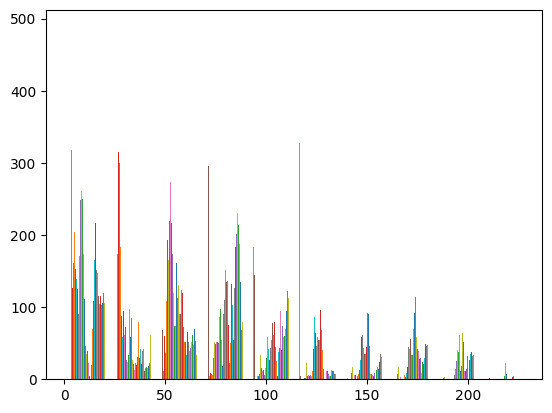

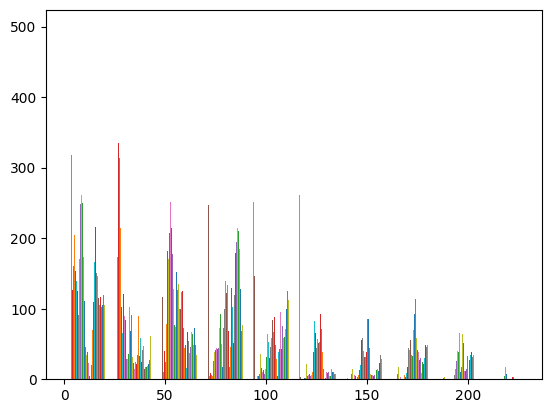

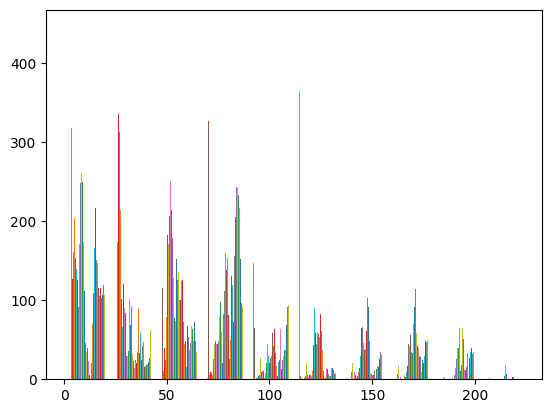

In [ ]:
# To be completed
# Display histograms of original and quantized images
for i, (quant_img, levels) in enumerate(zip(quantized_images, gray_levels)):
  plt.hist(quant_img)
  plt.show()

---
**2.**

Let's move on to the color image *cameleon.tif*.

Start by loading the grayscale image and displaying it.

In [ ]:
# To be completed
# Loading cameleon grayscale image
...
# Image display
...

Apply image quantization *cameleon* to keep only 128, 64, 32, 16, 8, 4 and 2 gray levels.

In [ ]:
# To be completed
# No quantification stored in a list
...
# Construction of a list of quantized images corresponding to each quantization step
...

Display the corresponding quantized images at each quantization step to determine the minimum quantization threshold at which some false contours appear.

In [ ]:
# To be completed
# Display original and quantized images
...

Display the histogram of the original and quantized images using Matplotlib's hist function.

In [ ]:
# To be completed
# Display histograms of original and quantized images
...

Compare the results obtained with the 2 images and conclude.

**_REPONSE :_**

---
**3.**
Quantization can also be performed for color images. To do this, we'll load the *lena_color* image.

In [ ]:
# To be completed
# Load the image lena_color
...

As you already know, a color image has 3 almost independent channels. We can quantize the image using the same function developed previously on each of the channels. Try out this method on each of *lena_color*'s channels, in the same way as above, keeping only 4 gray levels, and display the result.

In [ ]:
# To be completed
# Quantize each channel to keep only 4 gray levels
...
# Display quantized image
...

What do you notice?

## Ex 6. : Sub-sampling

**1.**

Load the grayscale image *mire.png* and display it.

In [ ]:
# A compléter
# Load the image
...
# Display the image
...

Create a subsampled version of this image by a factor of 2, using a function you write. To do this, create a new image by taking only every other pixel in the original image. (Perform this operation on the rows and columns of the original image).

In [ ]:
# To be completed
# Sub-sampling function
def subsampling(img,factor):
    ...

In [ ]:
# To be completed
# Display sub-sampled image with factor 2
...

---
**2.**

Create the same function without loops, thanks to NumPy array indexing.

In [ ]:
# To be completed
# Loop-free sub-sampling function
def subsampling2(img,factor):
    ...

In [ ]:
# To be completed
# Display sub-sampled image with factor 2
...

Describe the effect of sub-sampling.

**_ANSWER:_**

---
**3.**

Subsample the same image again, but by a factor of 4 (using the 2 functions you've implemented).

In [ ]:
# To be completed
# Display sub-sampled image with factor 4 (loop function)
...

In [ ]:
# To be completed
# Display sub-sampled image with factor 4 (loop-free function)
...

Describe the effects of sub-sampling.